In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
# upload one file (later all - customer no starts with 1 every day)
df = pd.read_csv('./data/monday.csv', sep=';') # , index_col=0
#df = pd.read_csv('./data/monday.csv', sep=';', parse_dates =["timestamp"], index_col ="timestamp") 
df.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [9]:
# create checkout for the customers at the end of the day

cust_checkout_no_record = []
for i in range(1, (df['customer_no'].nunique())+1):
    df_at = df[df['customer_no']==i] 
    # print(df_at)
    
    last_cust_occ = df_at.customer_no[-1:].values
    last_loc_occ = df_at.location[-1:].values
    # print(last_cust_occ, last_loc_occ)
    
    if last_loc_occ[0] != 'checkout':
        cust_checkout_no_record.append(last_cust_occ[0])

cust_checkout_no_record

[1430, 1433, 1437, 1439, 1440, 1441, 1443, 1445, 1446, 1447]

In [10]:
lst_dict = []

for cust_no in cust_checkout_no_record:
    
    # assuming that the remaining customers are checked out at 21:55
    new_row_dict = {'timestamp':'2019-09-02 21:55:00', 'customer_no':cust_no, 'location':'checkout'}    
    lst_dict.append(new_row_dict)

#append rows to the dataframe
df = df.append(lst_dict, ignore_index=True)
df.tail()

,timestamp,customer_no,location
4889,2019-09-02 21:55:00,1441,checkout
4890,2019-09-02 21:55:00,1443,checkout
4891,2019-09-02 21:55:00,1445,checkout
4892,2019-09-02 21:55:00,1446,checkout
4893,2019-09-02 21:55:00,1447,checkout


In [11]:
# create dummy column 
df['dummy']= 1
df.head()

,timestamp,customer_no,location,dummy
0,2019-09-02 07:03:00,1,dairy,1
1,2019-09-02 07:03:00,2,dairy,1
2,2019-09-02 07:04:00,3,dairy,1
3,2019-09-02 07:04:00,4,dairy,1
4,2019-09-02 07:04:00,5,spices,1


In [12]:
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index('timestamp')

,customer_no,location,dummy
timestamp,,,
2019-09-02 07:03:00,1,dairy,1
2019-09-02 07:03:00,2,dairy,1
2019-09-02 07:04:00,3,dairy,1
2019-09-02 07:04:00,4,dairy,1
2019-09-02 07:04:00,5,spices,1
...,...,...,...
2019-09-02 21:55:00,1441,checkout,1
2019-09-02 21:55:00,1443,checkout,1
2019-09-02 21:55:00,1445,checkout,1


In [22]:
df2 = df.groupby('timestamp')[['dummy']].count()
df2.head(8)

,dummy
timestamp,
2019-09-02 07:03:00,2
2019-09-02 07:04:00,6
2019-09-02 07:05:00,4
2019-09-02 07:06:00,8
2019-09-02 07:07:00,4
2019-09-02 07:08:00,4
2019-09-02 07:09:00,3
2019-09-02 07:10:00,1


In [20]:
## resample
df2_resampled = df2.resample(rule='1MIN').ffill()
df2_resampled.head(8)

,dummy
timestamp,
2019-09-02 07:03:00,2
2019-09-02 07:04:00,6
2019-09-02 07:05:00,4
2019-09-02 07:06:00,8
2019-09-02 07:07:00,4
2019-09-02 07:08:00,4
2019-09-02 07:09:00,3
2019-09-02 07:10:00,1


#### Calculate the total number of customers in the supermarket over time.

<AxesSubplot:xlabel='timestamp', ylabel='dummy'>

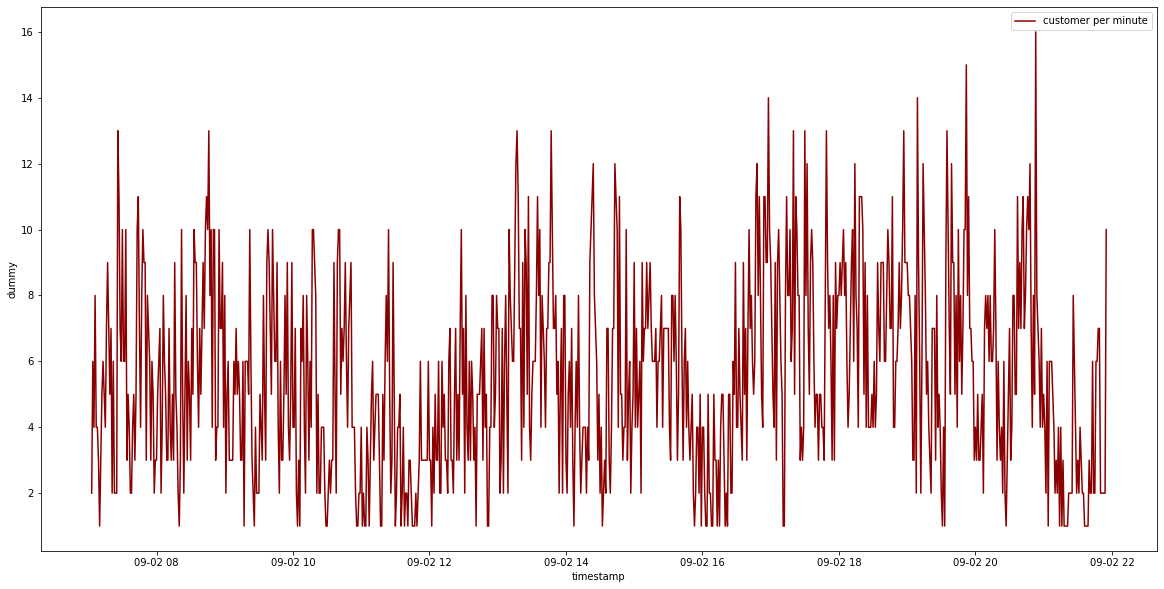

In [15]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df2_resampled, x="timestamp", y="dummy", color ='darkred', label='customer per minute')

<AxesSubplot:xlabel='timestamp', ylabel='dummy'>

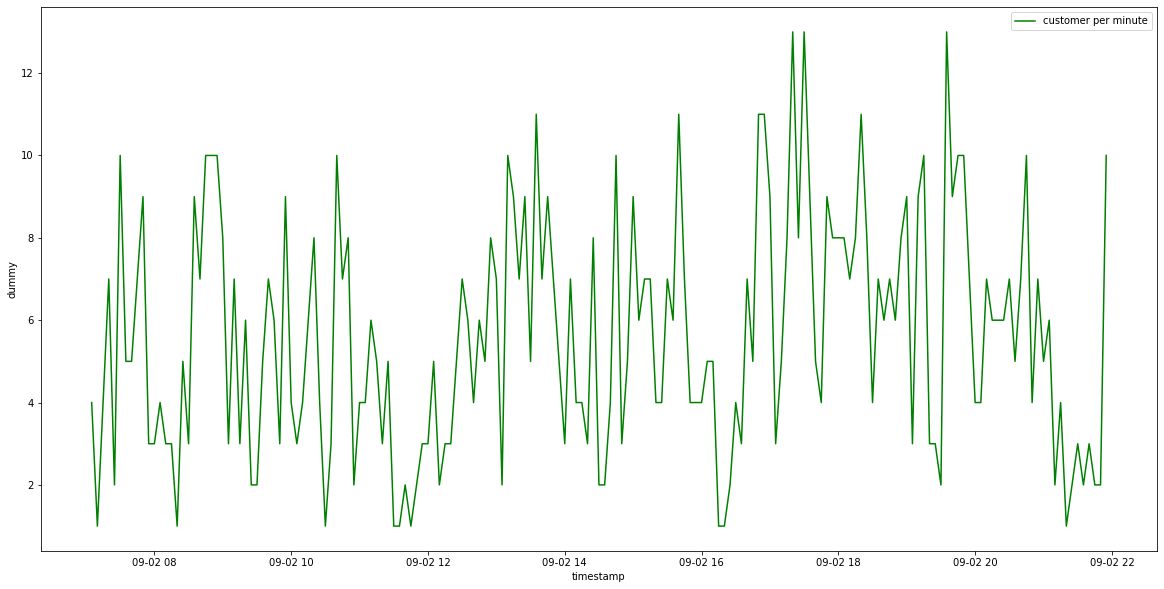

In [16]:
# aggregate over 5 min/ downsampling
df2_resampled = df2.resample(rule='5MIN').ffill()
plt.figure(figsize=(20,10))
sns.lineplot(data=df2_resampled, x="timestamp", y="dummy", color ='green', label='customer per minute')

### best aggregate to see peaks = 30 min: 

<AxesSubplot:xlabel='timestamp', ylabel='dummy'>

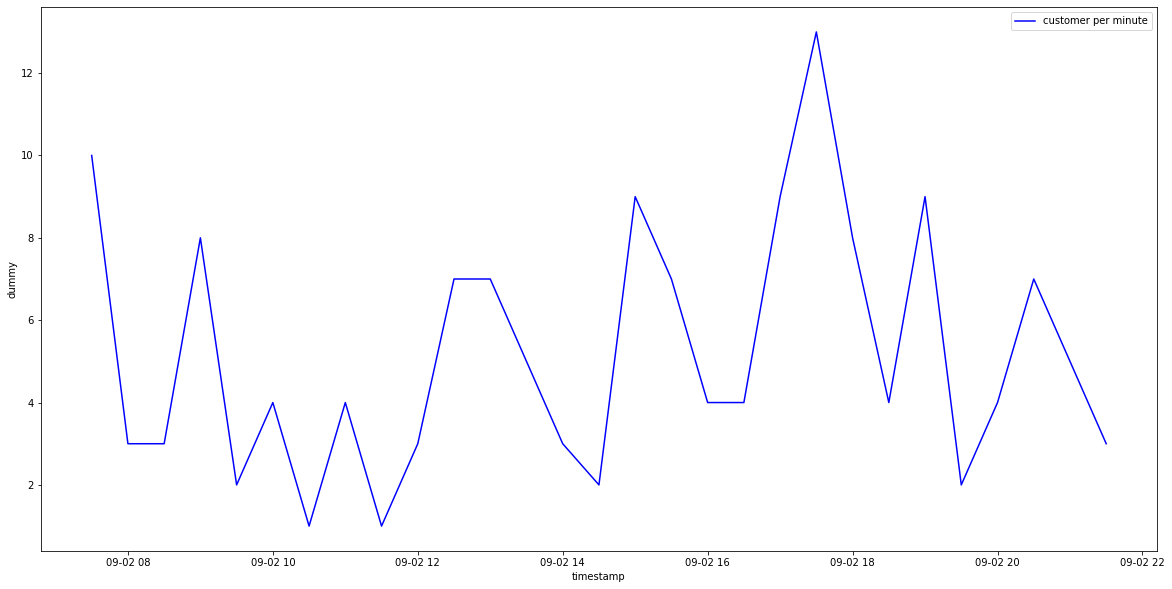

In [17]:
df2_resampled = df2.resample(rule='30MIN').ffill()
plt.figure(figsize=(20,10))
sns.lineplot(data=df2_resampled, x="timestamp", y="dummy", color ='blue', label='customer per minute')

<AxesSubplot:xlabel='timestamp', ylabel='dummy'>

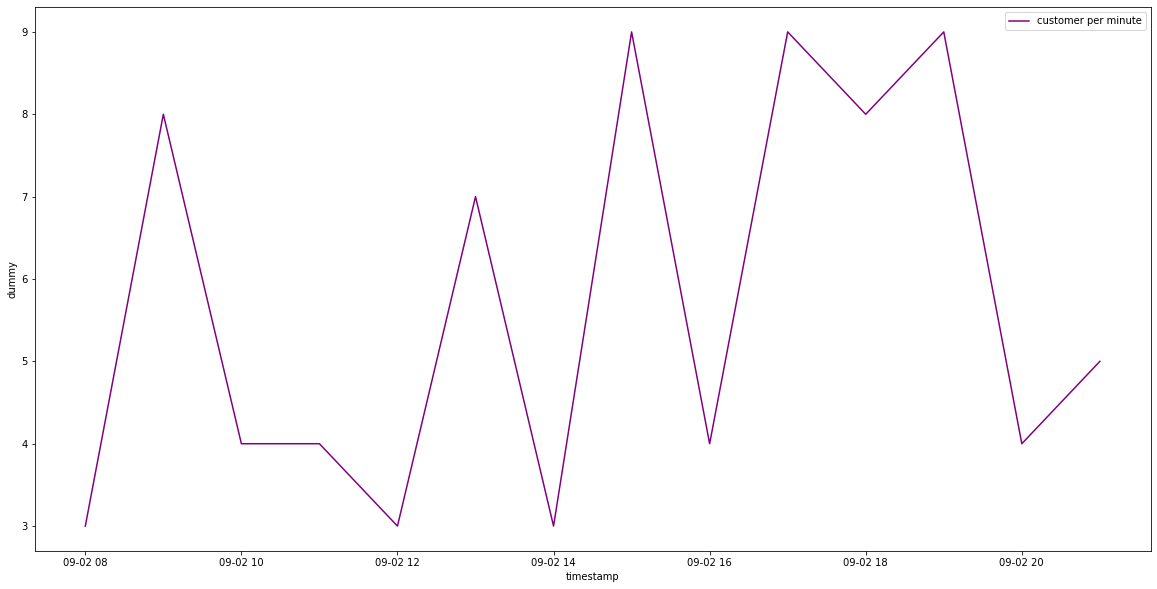

In [18]:
df2_resampled = df2.resample(rule='1H').ffill()
plt.figure(figsize=(20,10))
sns.lineplot(data=df2_resampled, x="timestamp", y="dummy", color ='purple', label='customer per minute')